In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as k
from tensorflow.keras.utils import get_custom_objects

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#tf.compat.v1.disable_eager_execution()

In [ ]:
# download the dataset
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# image classes or categories
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [ ]:
print("Number of Training Samples: ", len(x_train))
print("Number of Validation Samples: ", len(x_val))

Number of Training Samples:  60000
Number of Validation Samples:  10000


In [ ]:
# shape of images
print("Shape of Training images: ", x_train.shape)
print("Shape of Validation images: ", x_val.shape)

Shape of Training images:  (60000, 28, 28)
Shape of Validation images:  (10000, 28, 28)


In [ ]:
# reshape for training and testing
x_train = x_train.reshape(60000, 28, 28, 1)
x_val = x_val.reshape(10000, 28, 28, 1)

In [ ]:
# change data type
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

In [ ]:
# normalize data into range 1-0
x_train /= 255.0
x_val /= 255.0

In [ ]:
print("Training shape: ", x_train.shape)
print("Validation shape: ", x_val.shape)

Training shape:  (60000, 28, 28, 1)
Validation shape:  (10000, 28, 28, 1)


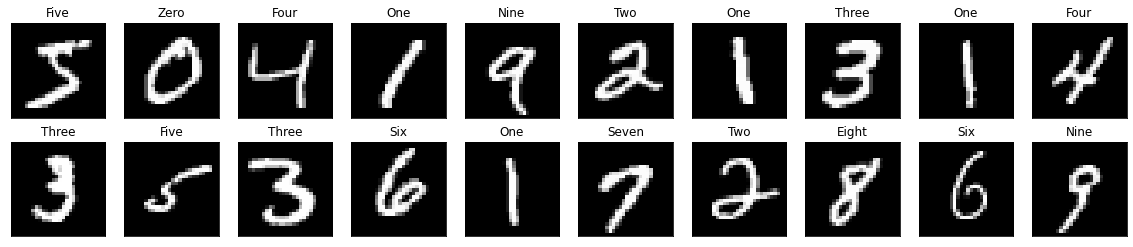

In [ ]:
# show some training images
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_train[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[y_train[idx]])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#model.save('./drive/My Drive/PhD_Thesis/models/Bnet/Bnet.h5')

In [ ]:
model = load_model('./drive/My Drive/PhD_Thesis/models/Bnet/Bnet.h5')

In [ ]:
# accuracy and loss of model on test data
orig_loss, orig_accuracy = model.evaluate(x_val, y_val)
print()
print("Model Accuracy on test images: ", round(orig_accuracy, 4))
print("Model Loss on test images: ", round(orig_loss, 4))

313/313 [==============================] - 10s 7ms/step - loss: 0.0347 - accuracy: 0.9939

Model Accuracy on test images:  0.9939
Model Loss on test images:  0.0347


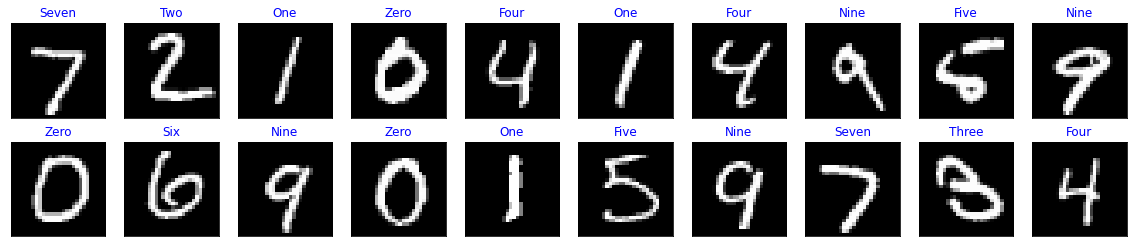

In [ ]:
# predict some testing images
predictions = model.predict(x_val)

# show test images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
  plt.imshow(x_val[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(x_val[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[np.argmax(predictions[idx])], color =  color)

# 2. Fast Gradient Sign Method (Attack) and Reconstruction of Adversarial Examples 

In [ ]:
# accuracy and loss of model on test data
orig_loss, orig_accuracy = model.evaluate(x_val, y_val)
print()
print("Model Accuracy on test images: ", round(orig_accuracy, 4))
print("Model Loss on test images: ", round(orig_loss, 4))

313/313 [==============================] - 13s 41ms/step - loss: 0.0347 - accuracy: 0.9939

Model Accuracy on test images:  0.9939
Model Loss on test images:  0.0347


In [ ]:
import pickle
out = open('./drive/My Drive/PhD_Thesis/adv_examples/Bnet/fgsm.pickle', 'rb')
adv_fgsm = pickle.load(out)

In [ ]:
adv_pred = model.predict(adv_fgsm)

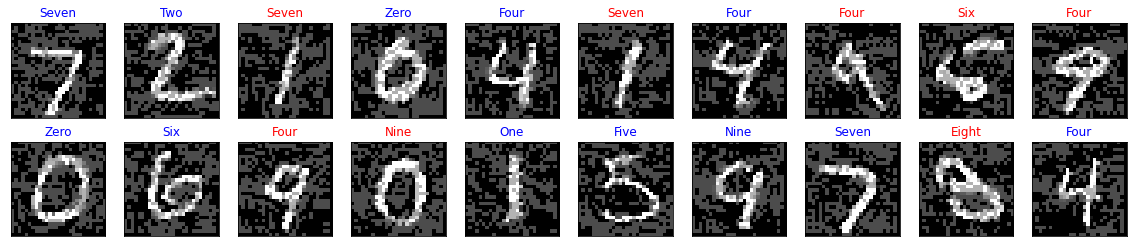

In [ ]:
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_fgsm[idx].reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[int(np.argmax(adv_pred[idx]))], color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_fgsm, y_val)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

313/313 [==============================] - 13s 42ms/step - loss: 3.1281 - accuracy: 0.6267

Model Accuracy on test images:  0.6267
Model Loss on test images:  3.1281


In [ ]:
# load denoising model to remove FGSM putrbation
d_model = runet_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/runet_models/Bnet/runet_fgsm.h5')

In [ ]:
# Restore adversarial images created due to FGSM attack 
deniose_fgsm = d_model.predict(adv_fgsm)

In [ ]:
# predict some restored images
predictions = model.predict(deniose_fgsm)

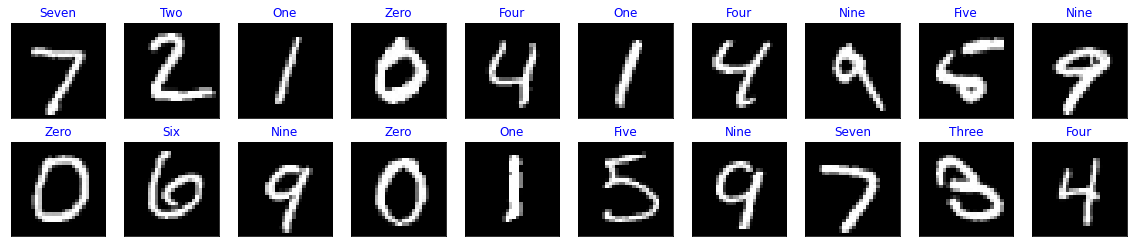

In [ ]:
# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
    
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(deniose_fgsm[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[np.argmax(predictions[idx])], color =  color)  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(deniose_fgsm, y_val)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

313/313 [==============================] - 13s 41ms/step - loss: 0.0381 - accuracy: 0.9934

Model Accuracy on restored images:  0.9934
Model Loss on test images:  0.0381


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.9995


# 2. Basic Iterative Method (Attack) and Reconstruction of Adversarial Examples 

In [ ]:
# accuracy and loss of model on test data
orig_loss, orig_accuracy = model.evaluate(x_val, y_val)
print()
print("Model Accuracy on test images: ", round(orig_accuracy, 4))
print("Model Loss on test images: ", round(orig_loss, 4))

313/313 [==============================] - 1s 3ms/step - loss: 0.0347 - accuracy: 0.9939

Model Accuracy on test images:  0.9939
Model Loss on test images:  0.0347


In [ ]:
import pickle
out = open('./drive/My Drive/PhD_Thesis/adv_examples/Bnet/bim.pickle', 'rb')
adv_bim = pickle.load(out)

In [ ]:
adv_pred = model.predict(adv_bim)

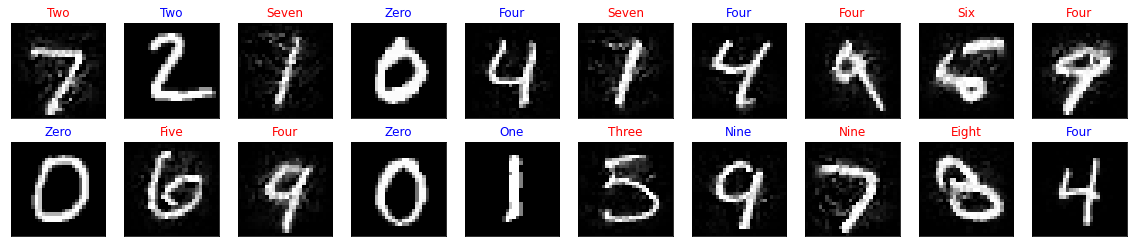

In [ ]:
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_bim[idx].reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[int(np.argmax(adv_pred[idx]))], color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_bim, y_val)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

313/313 [==============================] - 1s 3ms/step - loss: 10.6022 - accuracy: 0.5609

Model Accuracy on test images:  0.5609
Model Loss on test images:  10.6022


In [ ]:
# load denoising model to remove BIM putrbation
d_model = runet_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/runet_models/Bnet/runet_bim.h5')

In [ ]:
# Restore adversarial images created due to BIM attack 
deniose_bim = d_model.predict(adv_bim)

In [ ]:
# predict some restored images
predictions = model.predict(deniose_bim)

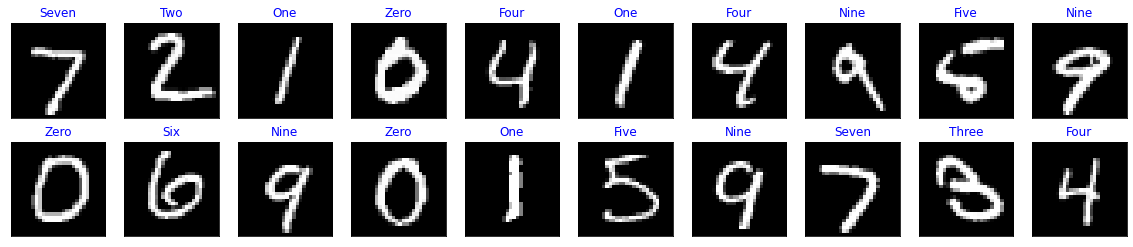

In [ ]:
# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
    
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(deniose_bim[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[np.argmax(predictions[idx])], color =  color)  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(deniose_bim, y_val)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

313/313 [==============================] - 1s 3ms/step - loss: 0.0380 - accuracy: 0.9935

Model Accuracy on restored images:  0.9935
Model Loss on test images:  0.038


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.9996


#3. Projected Gradient Descent Attack and Reconstruction of Adverasarial Examples

In [ ]:
# accuracy and loss of model on test data
orig_loss, orig_accuracy = model.evaluate(x_val, y_val)
print()
print("Model Accuracy on test images: ", round(orig_accuracy, 4))
print("Model Loss on test images: ", round(orig_loss, 4))

313/313 [==============================] - 2s 6ms/step - loss: 0.0347 - accuracy: 0.9939

Model Accuracy on test images:  0.9939
Model Loss on test images:  0.0347


In [ ]:
import pickle
out = open('./drive/My Drive/PhD_Thesis/adv_examples/Bnet/pgd.pickle', 'rb')
adv_pgd = pickle.load(out)

In [ ]:
adv_pred = model.predict(adv_pgd)

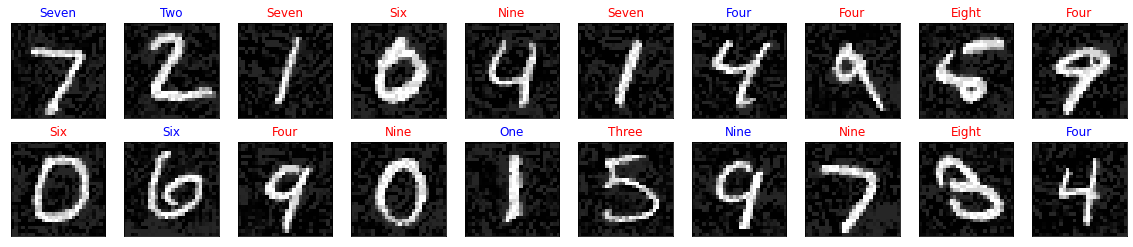

In [ ]:
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_pgd[idx].reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[int(np.argmax(adv_pred[idx]))], color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_pgd, y_val)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

313/313 [==============================] - 11s 35ms/step - loss: 9.1443 - accuracy: 0.3870

Model Accuracy on test images:  0.387
Model Loss on test images:  9.1443


In [ ]:
# load denoising model to remove PGD putrbation
d_model = runet_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/runet_models/Bnet/runet_pgd.h5')

In [ ]:
# Restore adversarial images created due to PGD attack 
deniose_pgd = d_model.predict(adv_pgd)

In [ ]:
# predict some restored images
predictions = model.predict(deniose_pgd)

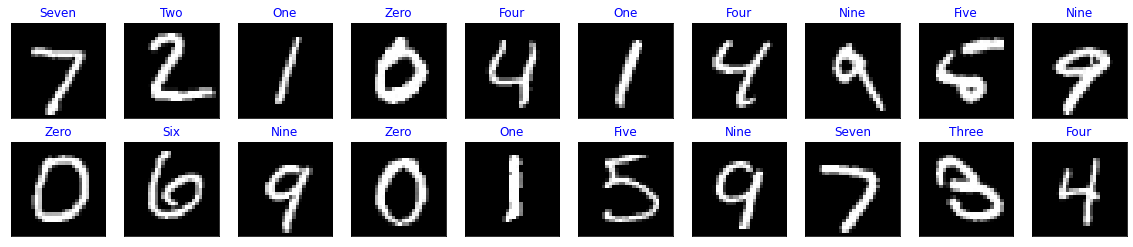

In [ ]:
# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
    
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(deniose_pgd[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[np.argmax(predictions[idx])], color =  color)  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(deniose_pgd, y_val)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

313/313 [==============================] - 11s 35ms/step - loss: 0.0353 - accuracy: 0.9939

Model Accuracy on restored images:  0.9939
Model Loss on test images:  0.0353


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  1.0


In [ ]:
import pickle
rest_image = open('./drive/My Drive/PhD_Thesis/restored_images/rest_pgd.pickle', 'wb')
pickle.dump(deniose_pgd, rest_image)

#4. Deep Fool Attack

In [ ]:
# accuracy and loss of model on test data
orig_loss, orig_accuracy = model.evaluate(x_val, y_val)
print()
print("Model Accuracy on test images: ", round(orig_accuracy, 4))
print("Model Loss on test images: ", round(orig_loss, 4))

313/313 [==============================] - 12s 40ms/step - loss: 0.0347 - accuracy: 0.9939

Model Accuracy on test images:  0.9939
Model Loss on test images:  0.0347


In [ ]:
import pickle
out = open('./drive/My Drive/PhD_Thesis/adv_examples/Bnet/dfa.pickle', 'rb')
adv_dfa = pickle.load(out)

In [ ]:
adv_pred = model.predict(adv_dfa)

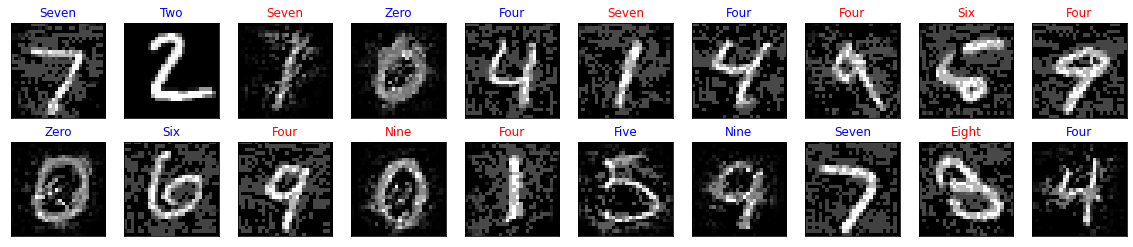

In [ ]:
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(adv_dfa[idx].reshape(28, 28), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[int(np.argmax(adv_pred[idx]))], color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_dfa, y_val)
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

313/313 [==============================] - 13s 40ms/step - loss: 3.2638 - accuracy: 0.6190

Model Accuracy on test images:  0.619
Model Loss on test images:  3.2638


In [ ]:
# load denoising model to remove DFA putrbation
d_model = runet_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/runet_models/Bnet/runet_dfa.h5')

In [ ]:
# Restore adversarial images created due to DFA attack 
deniose_dfa = d_model.predict(adv_dfa)

In [ ]:
# predict some restored images
predictions = model.predict(deniose_dfa)

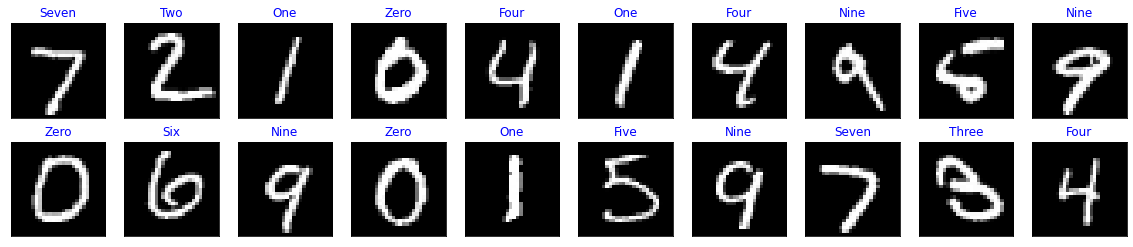

In [ ]:
# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
    
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(deniose_dfa[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[np.argmax(predictions[idx])], color =  color)  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(deniose_dfa, y_val)
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

313/313 [==============================] - 12s 40ms/step - loss: 0.0398 - accuracy: 0.9918

Model Accuracy on restored images:  0.9918
Model Loss on test images:  0.0398


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.9979


# 5. Carlini and Wanger Attack

In [ ]:
# accuracy and loss of model on test data
orig_loss, orig_accuracy = model.evaluate(x_val[:1000], y_val[:1000])
print()
print("Model Accuracy on test images: ", round(orig_accuracy, 4))
print("Model Loss on test images: ", round(orig_loss, 4))

32/32 [==============================] - 0s 6ms/step - loss: 0.0407 - accuracy: 0.9910

Model Accuracy on test images:  0.991
Model Loss on test images:  0.0407


In [ ]:
import pickle
out = open('./drive/My Drive/PhD_Thesis/adv_examples/Bnet/cwa.pickle', 'rb')
adv_cwa = pickle.load(out)

In [ ]:
adv_pred = model.predict(adv_cwa)

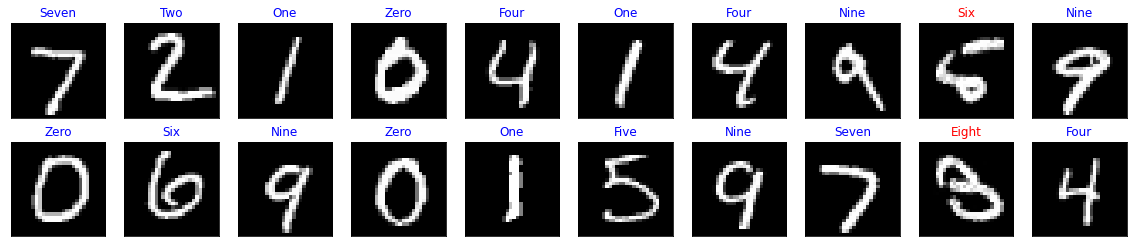

In [ ]:
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_cwa[idx].reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[int(np.argmax(adv_pred[idx]))], color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_cwa, y_val[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 0.3567 - accuracy: 0.8130

Model Accuracy on test images:  0.813
Model Loss on test images:  0.3567


In [ ]:
# load denoising model to remove DFA putrbation
d_model = runet_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis/models/mnist/runet_cwa.h5')

In [ ]:
# Restore adversarial images created due to DFA attack 
deniose_cwa = d_model.predict(adv_cwa)

In [ ]:
# predict some restored images
predictions = model.predict(deniose_cwa)

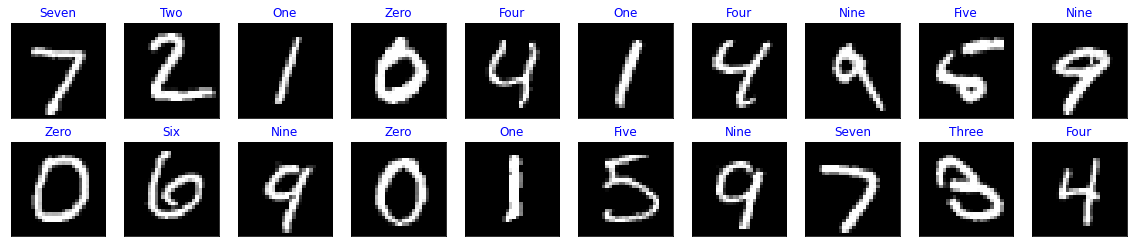

In [ ]:
# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
    
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(deniose_cwa[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[np.argmax(predictions[idx])], color =  color)  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(deniose_cwa, y_val[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9940

Model Accuracy on restored images:  0.994
Model Loss on test images:  0.0195


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  0.999


In [ ]:
import pickle
rest_image = open('./drive/My Drive/PhD_Thesis/restored_images/rest_cwa.pickle', 'wb')
pickle.dump(deniose_cwa, rest_image)

# 6. Spatial attack and Reconstruction of Adverasarial Examples

In [ ]:
# accuracy and loss of model on test data
orig_loss, orig_accuracy = model.evaluate(x_val[:1000], y_val[:1000])
print()
print("Model Accuracy on test images: ", round(orig_accuracy, 4))
print("Model Loss on test images: ", round(orig_loss, 4))

32/32 [==============================] - 0s 5ms/step - loss: 0.0407 - accuracy: 0.9910

Model Accuracy on test images:  0.991
Model Loss on test images:  0.0407


In [ ]:
import pickle
out = open('./drive/My Drive/PhD_Thesis/adv_examples/Bnet/spa.pickle', 'rb')
adv_spa = pickle.load(out)

In [ ]:
adv_pred = model.predict(adv_spa)

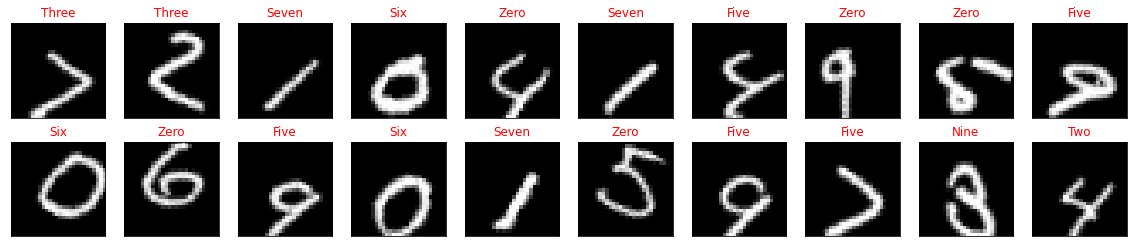

In [ ]:
fig = plt.figure(figsize = (20, 4))

for idx in range(20):
  fig = plt.subplot(2, 10 , idx + 1, xticks = ([]), yticks = ([]))
  plt.imshow(np.clip(adv_spa[idx].reshape(28, 28), 0, 1), cmap = 'gray')
  
  if class_names[int(np.argmax(adv_pred[idx]))] == class_names[y_val[idx]]:
    color = 'blue'
  else:
    color = 'red'
  
  plt.title(class_names[int(np.argmax(adv_pred[idx]))], color = color)

In [ ]:
# accuracy and loss of model on adversarial images
adv_loss, adv_accuracy = model.evaluate(adv_spa, y_val[:1000])
print()
print("Model Accuracy on test images: ", round(adv_accuracy, 4))
print("Model Loss on test images: ", round(adv_loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 4.6990 - accuracy: 0.0030

Model Accuracy on test images:  0.003
Model Loss on test images:  4.699


In [ ]:
# load denoising model to remove SPA putrbation
d_model = runet_model = tf.keras.models.load_model('./drive/My Drive/PhD_Thesis//runet_models/Bnet/runet_spa.h5')

In [ ]:
# Restore adversarial images created due to SP attack 
deniose_spa = d_model.predict(adv_spa)

In [ ]:
# predict some restored images
predictions = model.predict(deniose_spa)

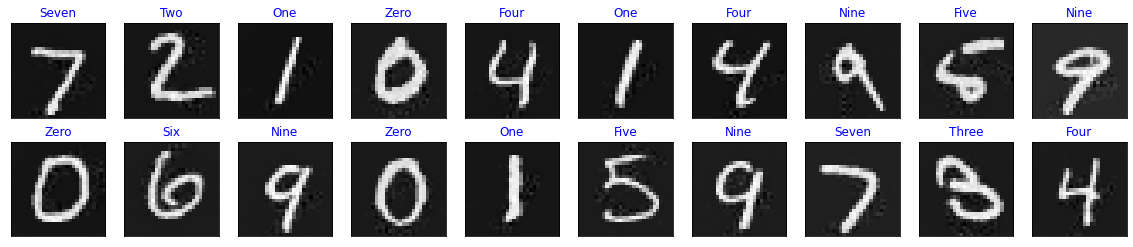

In [ ]:
# show restored images
fig = plt.figure(figsize = (20, 4))
for idx in range(20):
  ax = fig.add_subplot(2, 10, idx + 1, xticks = [], yticks = [])
    
  if class_names[y_val[idx]] == class_names[np.argmax(predictions[idx])]:
    color = 'blue'
  else:
    color = 'red'

  plt.imshow(deniose_spa[idx].reshape(28, 28), cmap = 'gray')
  plt.title(class_names[np.argmax(predictions[idx])], color =  color)  

In [ ]:
# accuracy and loss of model on restored images
rest_loss, rest_accuracy = model.evaluate(deniose_spa, y_val[:1000])
print()
print("Model Accuracy on restored images: ", round(rest_accuracy, 4))
print("Model Loss on test images: ", round(rest_loss, 4))

32/32 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9910

Model Accuracy on restored images:  0.991
Model Loss on test images:  0.0405


In [ ]:
print('Sucess of Defence Model: ', round(rest_accuracy / orig_accuracy, 4))

Sucess of Defence Model:  1.0


# Some examples of Restored examples

In [ ]:
adv_examples = np.concatenate([fgsm_imgs[:2], bim_imgs[2:4], pgd_imgs[4:6], dfa_imgs[6:8], cwa_imgs[8:10], spa_imgs[10:12]])
adv_examples.shape

(12, 28, 28, 1)

In [ ]:
adv_pert = np.concatenate([fgsm_p[:2], bim_p[2:4], pgd_p[4:6], dfa_p[6:8], cwa_p[8:10], spa_p[10:12]])
adv_pert = 3 * adv_pert

In [ ]:
restored_examples = np.concatenate([denise_fgsm[:2], denise_bim[2:4], denise_pgd[4:6], denise_dfa[6:8], denise_cwa[8:10], denise_spa[10:12]])
restored_examples.shape 

(12, 28, 28, 1)

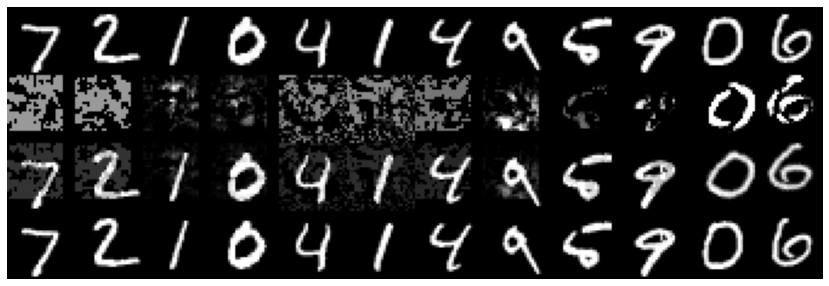

In [ ]:
imgs = np.concatenate([x_val[:12].reshape(12, 28, 28), adv_pert.reshape(12, 28, 28) ,adv_examples.reshape(12, 28, 28), restored_examples[:12].reshape(12, 28, 28)])
imgs = imgs.reshape((4, 12, 28, 28))
imgs = np.clip(imgs, 0, 1)
imgs = np.vstack([np.hstack(i) for i in imgs])
plt.figure(figsize = (16, 5))
plt.axis('off')
#plt.title('Input: 1st 2 rows, Decoded: last 2 rows')
plt.imshow(imgs, cmap = 'gray')